<a href="https://colab.research.google.com/github/Leamich/Ragaik/blob/feature%2FOCR_dataset_generation/character_recognition/notebooks/ru_ocr_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import pipeline

pipe = pipeline("image-to-text", model="raxtemur/trocr-base-ru", device=0)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [2]:
from google.colab import drive
from pathlib import Path

drive.mount("/content/gdrive")
data_path = Path("/content/gdrive/MyDrive/ragaik/sample_aik_ru_text/dump_medium")
drive_path = Path("/content/gdrive/MyDrive/ragaik/")

Mounted at /content/gdrive


In [ ]:
paths = sorted(data_path.glob("*.png"))

In [ ]:
from tqdm import tqdm

preds = [pipe(str(path)) for path in tqdm(paths)]



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:36<02:26, 36.61s/it]

 40%|████      | 2/5 [01:04<01:35, 31.75s/it]

 60%|██████    | 3/5 [01:41<01:08, 34.15s/it]

 80%|████████  | 4/5 [02:38<00:42, 42.81s/it]

100%|██████████| 5/5 [03:31<00:00, 42.28s/it]


In [ ]:
preds

[[{'generated_text': 'Георгиева,Лаусто, трипультурного,'}],
 [{'generated_text': 'Восточного также назаторожного'}],
 [{'generated_text': 'непозволяют нахитовалось колобистической.'}],
 [{'generated_text': 'Упр.ДеревняДейственностьСтихирово-последования Видеотв'}],
 [{'generated_text': 'Е.Добавление КрадаДобавательность Команда,перепавшица'}]]

In [ ]:
from PIL import Image

In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")

In [ ]:
sample_images_to_visualize = [Image.open(path) for path in paths]
plot_images(sample_images_to_visualize, [d[0]["generated_text"] for d in preds])

In [ ]:
data_path = Path("/content/gdrive/MyDrive/ragaik/sample_aik_ru_text/dump_small")
paths = sorted(data_path.glob("*.png"))

In [ ]:
from tqdm import tqdm

preds = [pipe(str(path)) for path in tqdm(paths)]



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:11<00:46, 11.73s/it]

 40%|████      | 2/5 [00:34<00:54, 18.05s/it]

 60%|██████    | 3/5 [01:05<00:48, 24.15s/it]

 80%|████████  | 4/5 [01:41<00:28, 28.59s/it]

100%|██████████| 5/5 [02:22<00:00, 28.46s/it]


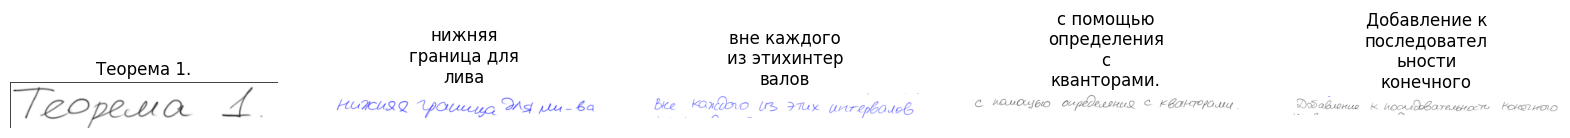

In [ ]:
sample_images_to_visualize = [Image.open(path) for path in paths]
plot_images(sample_images_to_visualize, [d[0]["generated_text"] for d in preds])

**Мораль**: чем меньше боксы, тем лучше.

# Inference on boxes

In [3]:
!unzip {drive_path / "dump01_AIK_data.zip"} -d /content/data

Archive:  /content/gdrive/MyDrive/ragaik/dump01_AIK_data.zip
   creating: /content/data/dump01_AIK/
  inflating: /content/data/dump01_AIK/MatAn-Dec11-03.txt  
  inflating: /content/data/dump01_AIK/MatAn-Dec27-09.txt  
  inflating: /content/data/dump01_AIK/MatAn-Feb12-03.png  
  inflating: /content/data/dump01_AIK/MatAn-Feb19-06.png  
  inflating: /content/data/dump01_AIK/MatAn-Dec11-04.png  
  inflating: /content/data/dump01_AIK/MatAn-Feb12-11.txt  
  inflating: /content/data/dump01_AIK/MatAn-Apr03-02.png  
  inflating: /content/data/dump01_AIK/MatAn-Feb19-14.png  
  inflating: /content/data/dump01_AIK/MatAn-Feb26-02.txt  
  inflating: /content/data/dump01_AIK/MatAn-Dec27-01.txt  
  inflating: /content/data/dump01_AIK/MatAn-Feb26-09.png  
  inflating: /content/data/dump01_AIK/MatAn-Feb19-04.txt  
  inflating: /content/data/dump01_AIK/MatAn-Dec04-10.txt  
  inflating: /content/data/dump01_AIK/MatAn-Dec04-11.png  
  inflating: /content/data/dump01_AIK/MatAn-Feb04-6.png  
  inflating: /co

In [4]:
data_path = Path("/content/data/dump01_AIK")
imgs = sorted(data_path.glob("*.png"))

In [5]:
import cv2
from PIL import Image

In [ ]:
img = Image.open("/content/data/dump01_AIK/MatAn-Feb12-12.png")
boxes = []
with open("/content/data/dump01_AIK/MatAn-Feb12-12.txt") as f:
    for line in f:
        d = list(map(float, line.split()))
        boxes.append(d)

In [ ]:
W, H = img.width, img.height

In [ ]:
cropped_images = []
for label, x_center, y_center, width, height, conf in boxes:
    if label == 0:
        continue
    left, upper, right, lower = (x_center - width / 2) * W, (y_center - height / 2) * H, (x_center + width / 2) * W, (y_center + height / 2) * H
    cropped_img = img.crop((left, upper, right, lower))
    cropped_images.append(cropped_img)

In [ ]:
len(cropped_images)

49

In [ ]:
%%time
preds = pipe(cropped_images)

CPU times: user 10.4 s, sys: 31.6 ms, total: 10.4 s
Wall time: 11.1 s


In [ ]:
import matplotlib.pyplot as plt

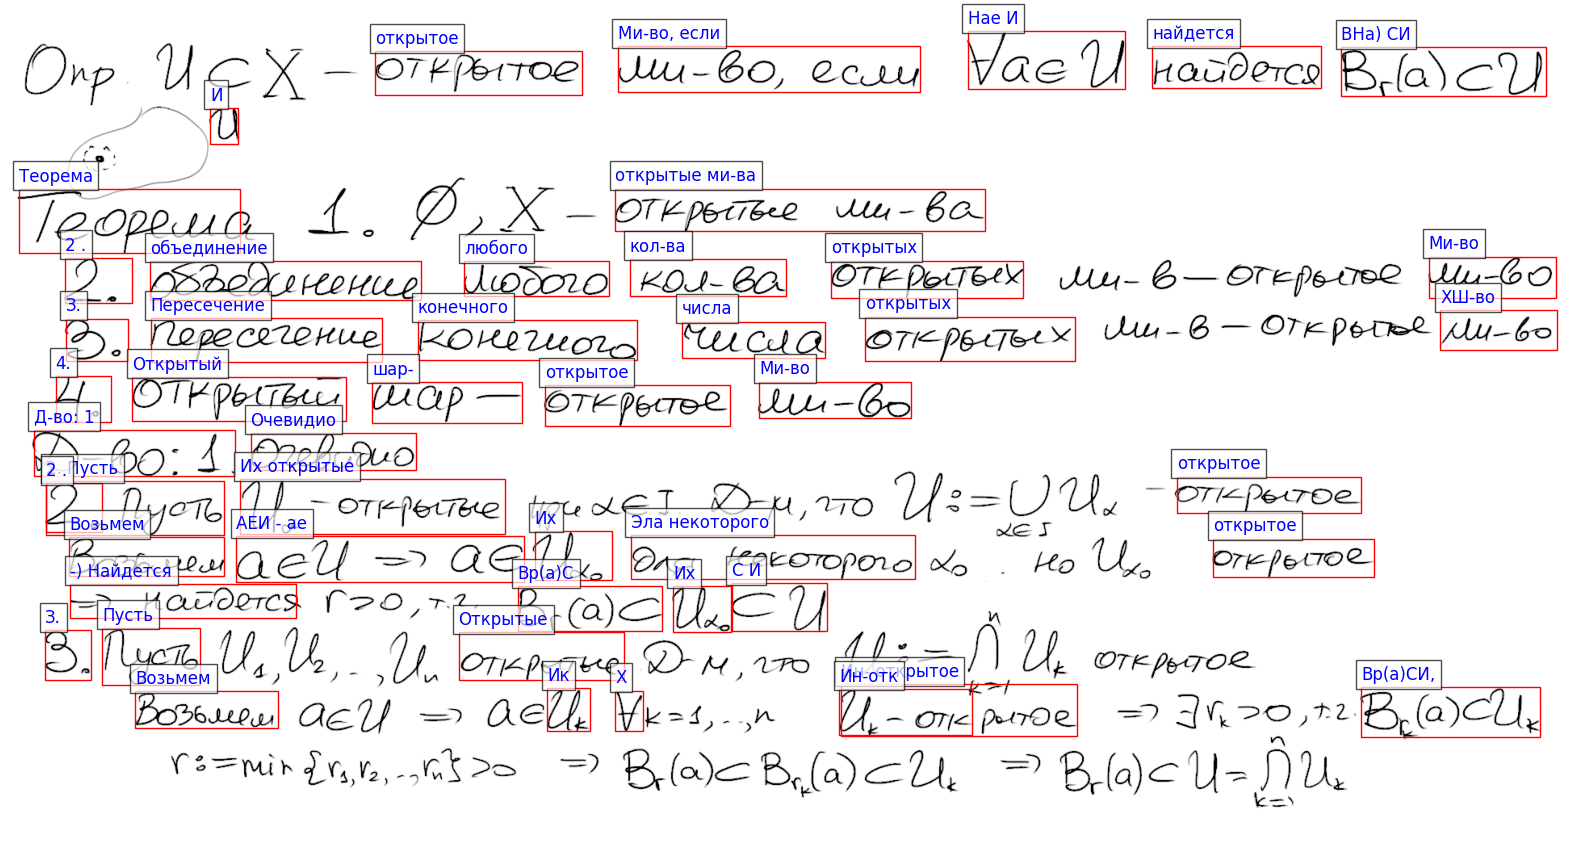

In [ ]:
# GENERATED CODE
# prompt: plot image with predicted texts, whole image, with the text around box

def plot_image_with_boxes(image, boxes, texts):
    plt.figure(figsize=(20, 20))
    plt.imshow(image, cmap="gray")
    ax = plt.gca()

    for box, text in zip(filter(lambda x: x[0] == 1,boxes), texts):
        label, x_center, y_center, width, height, conf = box
        if label == 0:
            continue
        W, H = image.width, image.height
        left, upper, right, lower = (x_center - width / 2) * W, (y_center - height / 2) * H, (x_center + width / 2) * W, (y_center + height / 2) * H

        rect = plt.Rectangle((left, upper), right - left, lower - upper, fill=False, color='red')
        ax.add_patch(rect)

        plt.text(left, upper - 10, text, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.axis("off")
    plt.show()

plot_image_with_boxes(img, boxes, [d[0]["generated_text"] for d in preds])

In [ ]:
from tqdm.notebook import tqdm

In [6]:
import pandas as pd

In [21]:
def gen_dataset(imgs):
    for img_path in imgs:
            img = Image.open(str(img_path))
            boxes = []
            with img_path.with_suffix(".txt").open() as f:
                for line in f:
                    d = list(map(float, line.split()))
                    boxes.append(d)

            W, H = img.width, img.height

            cropped_images = []
            for label, x_center, y_center, width, height, conf in boxes:
                if label == 0:
                    continue
                left, upper, right, lower = (x_center - width / 2) * W, (y_center - height / 2) * H, (x_center + width / 2) * W, (y_center + height / 2) * H
                cropped_img = img.crop((left, upper, right, lower))
                cropped_images.append(cropped_img)

            for box, cropped_img in zip(filter(lambda x: x[0] == 1, boxes), cropped_images):
                left, upper, right, lower = (x_center - width / 2) * W, (y_center - height / 2) * H, (x_center + width / 2) * W, (y_center + height / 2) * H
                yield {"img": cropped_img, "image_id": img_path.stem, "X_upper_left": upper, "Y_upper_left": left, "X_down_right": right, "Y_down_right": lower}

In [22]:
from datasets import Dataset

In [23]:
# Collect data from the generator
dataset_data = list(gen_dataset(imgs))

# Create a Hugging Face Dataset from the collected data
dataset = Dataset.from_list(dataset_data)

display(dataset)

Dataset({
    features: ['img', 'image_id', 'X_upper_left', 'Y_upper_left', 'X_down_right', 'Y_down_right'],
    num_rows: 2464
})

In [26]:
list_images = [d["img"] for d in dataset]

preds = pipe(list_images)

In [30]:
preds = [d[0]["generated_text"] for d in preds]

In [31]:
# prompt: dataset add column

dataset = dataset.add_column("text", preds)
display(dataset)

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['img', 'image_id', 'X_upper_left', 'Y_upper_left', 'X_down_right', 'Y_down_right', 'text'],
    num_rows: 2464
})

In [33]:
df = dataset.to_pandas()
df.drop(columns=["img"], inplace=True)
df

,image_id,X_upper_left,Y_upper_left,X_down_right,Y_down_right,text
0,MatAn-Apr03-01,344.833956,366.93888,622.42944,432.627532,ФлаЭйлера-Маккорена
1,MatAn-Apr03-01,344.833956,366.93888,622.42944,432.627532,Подставим
2,MatAn-Apr03-01,344.833956,366.93888,622.42944,432.627532,возле
3,MatAn-Apr03-01,344.833956,366.93888,622.42944,432.627532,Стирлинга:
4,MatAn-Apr03-01,344.833956,366.93888,622.42944,432.627532,Формула
...,...,...,...,...,...,...
2459,MatAn-Jan22-02,91.208052,98.60256,180.55392,150.123773,. 6-
2460,MatAn-Jan22-02,91.208052,98.60256,180.55392,150.123773,Из
2461,MatAn-Jan22-02,91.208052,98.60256,180.55392,150.123773,8(7)2
2462,MatAn-Jan22-02,91.208052,98.60256,180.55392,150.123773,Д-во: Сэо


In [34]:
df.to_csv("data.csv")